#CO70058 Computer Vision
#Tutorial 5 - Computational Stereo

## A little bit of theory:

References:
*   Book `Multiple View Geometry in computer vision`

Imagine that you have two cameras looking at a 3D point ($X$). To project that 3D point to `camera_1` you can do $x = PX$ and to `camera_2` you can do $x' = P'X$. The symbol $'$ will always mean that you are talking about `camera_2`.

![blender_scene](https://media.giphy.com/media/92VZP88vLgmue648g4/giphy.gif "blender_scene")

Basically, here all we want to do is answer the following question: 
> Given $x$ in `image_1`, how does this constrain $x'$ in `image_2`?


*  Well, one thing that is intuitive is that it will depend on the relative position between the cameras. For example, if you move `camera_2`, then $x'$ may move too.

![relative_motion](https://media.giphy.com/media/9VwybMZ9KsiRfJdi5f/giphy.gif "relative_motion")

*   The other thing that affects where the point will show up in the images are the camera intrinsic parameters, which directly affect $P$ and $P'$. For example, if you "zoom in" with `camera_2`, $P$ will change and $x'$ may also change.

![zooming](https://media.giphy.com/media/Ne5LE0Mqaav6WO9hCz/giphy.gif
 "zooming")

So are there really any constrains? Yes, there are and this is explained using the **epipolar geometry**, which is represented by a $3 \times 3$ matrix called the **fundamental matrix** $F$. Fancy names, uh?

### Epipolar geometry

First, observe that if I move the red ball in a direction prependicular to the image plane of `camera_1` it will remain in the same position $x$ but $x'$ will change (it will move along a line).

![epiline](https://media.giphy.com/media/xHsGusrOo4BodTacCR/giphy.gif "epiline")

This basically can be represented in the following draw:

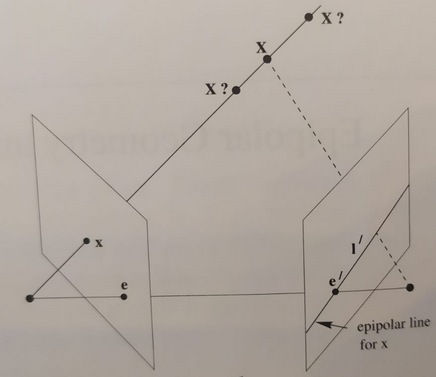

So with epipolar geometry we know that the correpondence to point $x$, in `camera_1`, will in  $l'$, in `camera_2`. $l'$ is called a epipolar line.

Basically we can define a plane (epipolar plane) containing the baseline (vector between the centre of the cameras) and point X. The epipolar plane intersects the two image planes on corrsponding epipolar lines $l$ and $l'$.

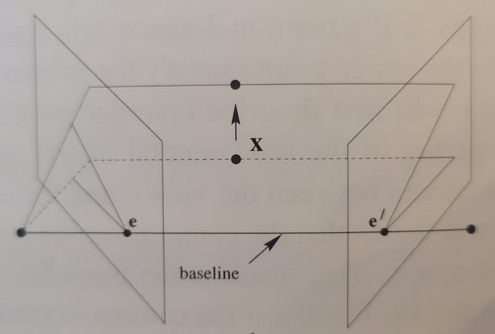

Epipolar geometry is basically the geometry between the epipolar lines. The easiest way to think about this is to imagine a plane rotating around the baseline. The intersection of the plane with the image planes forms the epipolar lines. The lines always converge in the direction of the epipole.

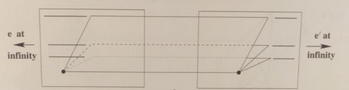

Perfect stereo cameras (parallel image planes) have the epipoles at infinity. Why? If the epipolar lines are parallel to each other, then the epipoles (points where the epipolar lines converge) are at infinity.


In this case, the epipolar lines are horizontal lines, so the $v$ coordinate of $x$, in `camera_1`, is the same as the $v$ coordinate of $x'$, in `camera_2`.

### Fundamental matrix $F$

The fundamental matrix is a matrix that represents the epipolar geometry. As I mentioned before, an image point $x$ in `camera_1` maps into a line $l'$ in `camera_2`. So the fundamental matrix $F$ basically projects points into lines, $x$ to $l'$.

\begin{equation}
    l' = Fx
\end{equation}
\begin{equation}
    l = F^Tx'
\end{equation}

#### Why do we want to use $F$?

Becuse it simplifies the correspondence problem. If we have a point in `camera_1` $x$ I can look for the correspondent point in `camera_2` by scanning through the line. So this makes the algorithms that try to match points between the two images faster!

#### How do I calculate F?

In OpenCV you can do it using the function [cv2.findFundamentalMat()](https://docs.opencv.org/master/d9/d0c/group__calib3d.html#ga59b0d57f46f8677fb5904294a23d404a), where you feed a set of points $x$ and their corresponding points $x'$. 

### Correspondence condition

For any pair of corresponding points $(x, x')$ the fundamental matrix satisfies the condition:

\begin{equation}
  x'^TFx=0
\end{equation}

## Tutorial Questions

Two cameras are placed at positions CL=[-5,0,0] and CR=[5,0,0] and both face in direction [0, 0, 1].

**Question 1.**

**Two feature points are identified on one image plane as [5,0] and [-4,0], the origin being at the centre of the image plane. What are the epipolar lines corresponding to these two points?**

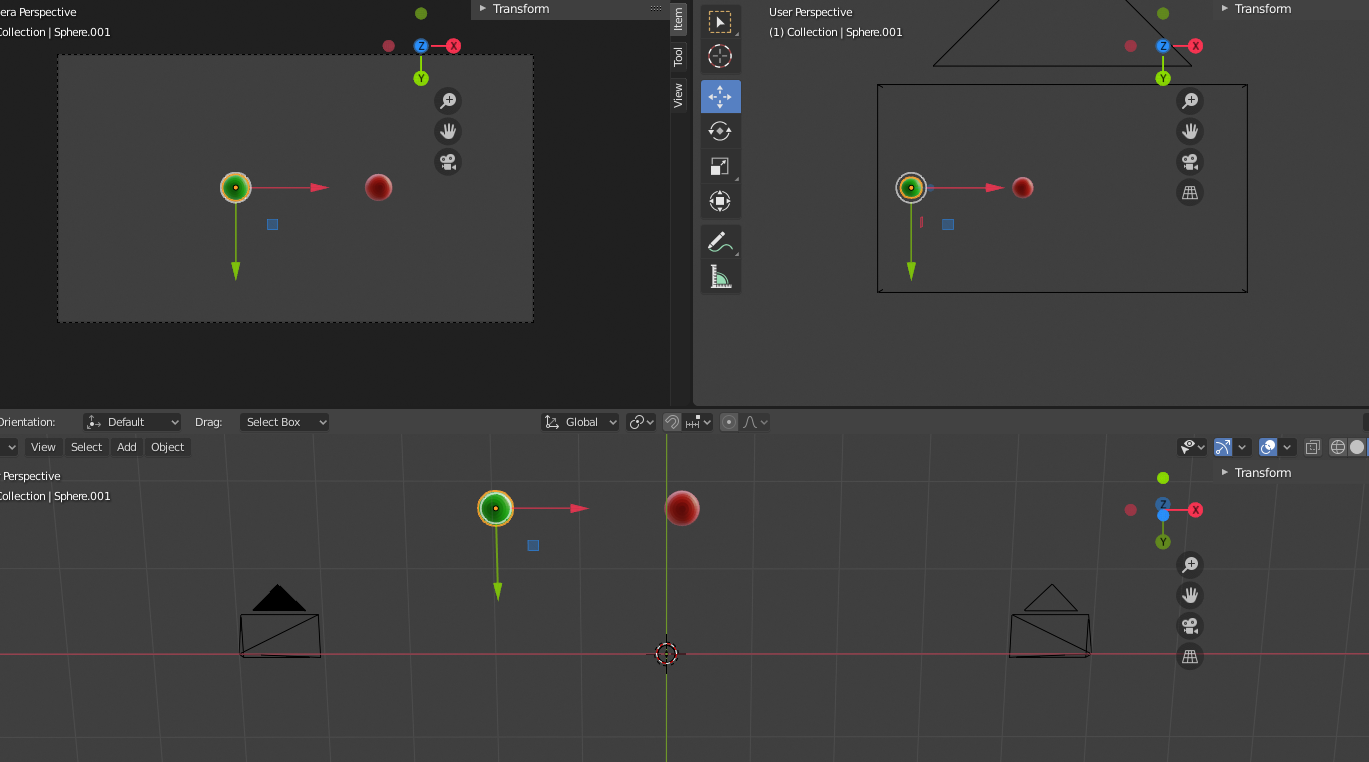

When they say that the cameras face the same direction what they mean is that the cameras have the same orientation. So we have to cameras that are parallel to each other, just like shown in the image above.

Given that $Y = 0$ and $Z = 0$ for both cameras we have a "perfect stereo" set-up, so the epipolar lines will be horizontal lines, just as we discussed in the theory above. So both the green and red ball will show in `camera_2` with the same $v$ coordinate as in `camera_1`. In this case the epipolar line is therefore the horizontal line passing in the middle of the views. 

**Question 2.**

**A point on an object has 3D position Pi=[ Xi,Yi,Zi]. Derive an expression for the epipolarplane where point Pi lies.**

One of the ways to define a plane in 3D is using a generic point in that plane and a vector that is prependicular to that plane (the normal vector $\vec{n}$). [Watch this YouTube video](https://www.youtube.com/watch?v=UJxgcVaNTqY).

We have other points besides $P_i$ on the epipolar plane, since we know that the epipolar plane passes through the camera centers. So CL and CR are also points on the epipolar plane. So let's consider two vector on the epipolar plane:

\begin{equation}
\vec{v_1} = Pi - CL = <Xi - (-5), Yi, Zi> = <Xi + 5, Yi, Zi>
\end{equation}

\begin{equation}
\vec{v_2} = CR - CL = <5 - (-5), 0, 0> = <10, 0, 0>
\end{equation}

How do we get $\vec{n}$?

We can do the [cross product](https://www.mathsisfun.com/algebra/vectors-cross-product.html) between two vectors on the plane. If you don't remember the cross product is calculated like this:

$\vec{a} \times \vec{b} = \vec{c}$

    cx = a_y b_z − a_z b_y
    cy = a_z b_x − a_x b_z
    cz = a_x b_y − a_y b_x

So for our vectors:

\begin{equation}
\vec{v_1} \times \vec{v_2} = <Yi \times 0 - Zi \times 0, Zi \times 10 - (Xi + 5) \times 0, (Xi + 5) \times 0 - Yi \times 10> = <0, 10 Zi, -10Yi>
\end{equation}

If the norm vector $\vec{n}$ is prependicular to the epipolar plane then it is also prependicular to any vector on that plane. So the [dot product](https://www.mathsisfun.com/algebra/vectors-dot-product.html) between $\vec{n}$ and $\vec{vec_{plane}}$ will be zero.

If we consider a generic point P on the plane, with world coordinates (X, Y, Z) then the vector between Pi and P is given by:

\begin{equation}
\vec{v_3} = Pi - P = <Xi - X, Yi - Y, Zi - Z>
\end{equation}

\begin{equation}
\vec{n} \cdot \vec{v_3} = 0
\end{equation}

\begin{equation}
<0, 10 Zi, -10Yi> \cdot <Xi - X, Yi - Y, Zi - Z> = 0 
\end{equation}

\begin{equation}
(10 Zi)(Yi - Y) + (-10 Yi)(Zi - Z)= 0 
\end{equation}

\begin{equation}
(10 Zi)(Yi - Y) = (10 Yi)(Zi - Z) 
\end{equation}

\begin{equation}
Zi Yi - Zi Y = Yi Zi - Yi Z 
\end{equation}

\begin{equation}
- Zi Y = - Yi Z 
\end{equation}

\begin{equation}
Y = (\dfrac{Yi}{Zi})  Z 
\end{equation}

So that's our epipolar plane equation.



**Question 3.**

**If the image plane of projection lies in the plane Z = 7,extract the equation of the epipolar line that appear in the left image.**

As we know from the theory, the epipolar lines are the lines that the epipolar planes creates on the image plane. In **2.** we calculated that the epipolar plane is given by $Y = (\dfrac{Yi}{Zi}) Z$ so when that plane intersects $Z = 7$ we get the following epipolar line: $Y = (\dfrac{Yi}{Zi}) 7$.

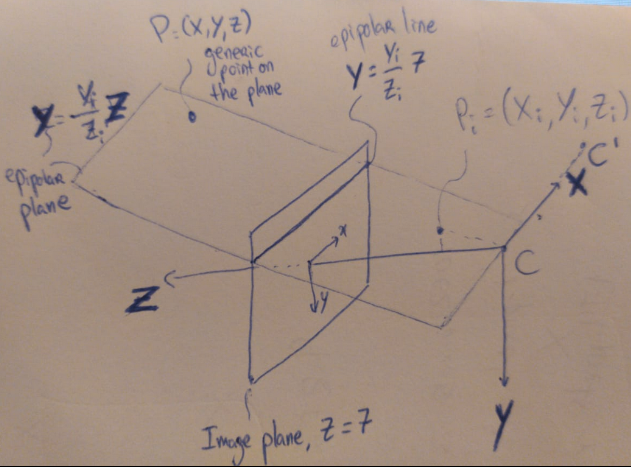